# ARIMA MODEL
Predicting Close from Date

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-25,474.390015,484.869995,468.029999,482.880005,482.880005,3769400
1,2020-09-28,489.109985,492.000000,477.880005,490.649994,490.649994,4773500
2,2020-09-29,489.500000,496.290009,486.529999,493.480011,493.480011,3541500
3,2020-09-30,492.570007,504.630005,489.269989,500.029999,500.029999,4634100
4,2020-10-01,506.029999,529.549988,503.600006,527.510010,527.510010,8153700


In [7]:
df = df[['Close']].copy()
df.describe()

,Close
count,252.000000
mean,523.046071
std,29.119454
min,470.500000
25%,500.837486
50%,518.484985
75%,540.909988
max,606.710022


In [9]:
# To check is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print("ADF Statistic: ", result[0])
print("P-Value: ",result[0])

ADF Statistic:  -2.886839094574603
P-Value:  -2.886839094574603


In [11]:
# To find how many times it must be differenced

from pmdarima.arima.utils import ndiffs

ndiffs(df.Close,test="adf")

1

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

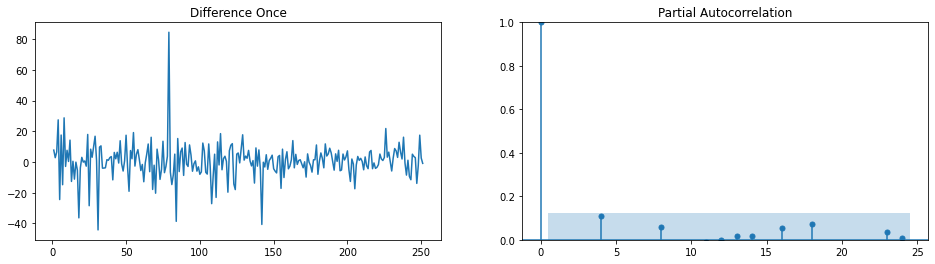

In [18]:
# Finding p term
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0, 1)
plot_pacf(diff,ax=ax2);

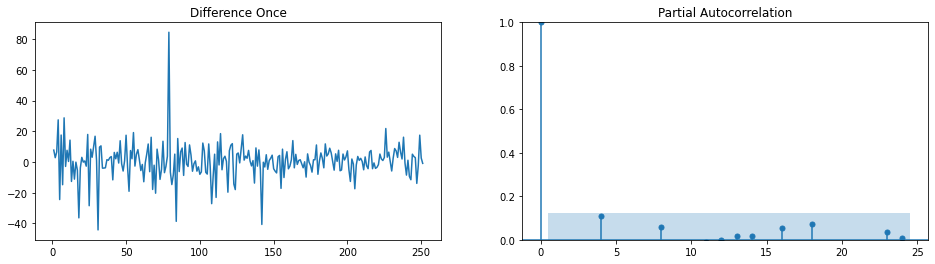

In [19]:
# Finding q term
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0, 1)
plot_pacf(diff,ax=ax2);

Taking p,d, q as 3 1 3

## Arima Model

In [31]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df.Close, order=(3,1,3))
result = model.fit(disp=0)

/Users/rishabhrao/Documents/conda_folder/env/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/rishabhrao/Documents/conda_folder/env/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inv

In [32]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  251
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -961.269
Method:                       css-mle   S.D. of innovations             11.013
Date:                Sun, 26 Sep 2021   AIC                           1938.539
Time:                        20:30:48   BIC                           1966.742
Sample:                             1   HQIC                          1949.888
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2234      0.106      2.102      0.036       0.015       0.432
ar.L1.D.Close    -0.8722      0.037    -23.665      0.000      -0.944      -0.800
ar.L2.D.Close     0.6883      0.050     

### Plotting Residual Errors
Mean should be around 0

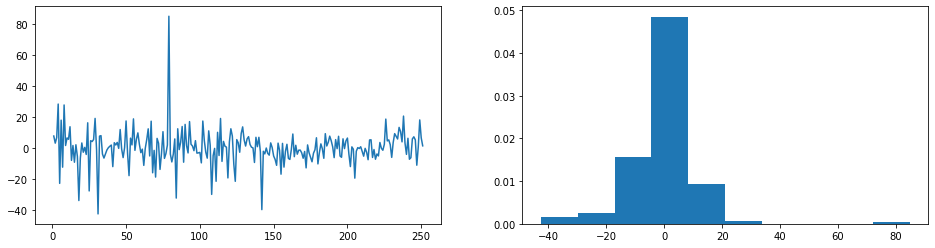

In [33]:
residuals = pd.DataFrame(result.resid)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True);

## Checking predicted vs actual

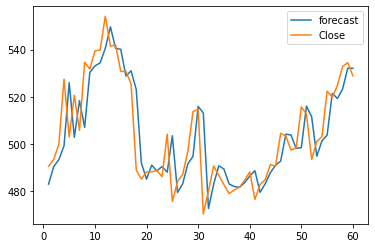

In [36]:
result.plot_predict(start=1,end=60,dynamic=False);